<a href="https://colab.research.google.com/github/PurvaChiniya/brain_Waves/blob/master/brain_waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data=pd.read_csv("news.csv")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words=text.ENGLISH_STOP_WORDS.union(punc)

In [0]:
data.text[0]

"NEW YORK (AP) - A prime rate reduction by New York's First National City Bank helped the stock market close out the busiest week in its history with a modest advance Friday.</br></br>The Dow Jones average of 30 industrial stocks gained 5.12 to 929.63, finishing the week withanetrise of 18.50 points.</br></br>Big Board volume, at 25.94 million shares, fell a good deal short of matching Thursday's all-time high of 38.45 million.</br></br>But the day�۪s figure was more than enough to push the total for the week to a record 159.69 million shares. The previous peak had been 145.68 million in the last week of January 1975.</br></br>The Dow has advanced in all but two of the first 11 sessions of the new year. As of Friday�۪s close it had gained 77.22 points since New Year�۪s."

In [0]:
text=data["text"].values
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')
def tokenize(text):
  return[stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]
vectorizer=TfidfVectorizer(stop_words=stop_words,tokenizer=tokenize,max_features=100000)


Text=vectorizer.fit_transform(text)
word_features=vectorizer.get_feature_names()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
print(len(word_features))

16968


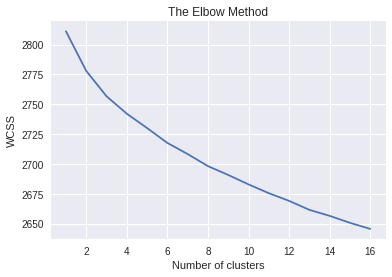

In [0]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,17):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=17,random_state=0)
    kmeans.fit(Text)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,17),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 4, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(Text)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(word_features[word] for word in centroid))

In [0]:
kmeans = KMeans(n_clusters = 10, n_init = 20, n_jobs = 1)
kmeans.fit(Text)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(word_features[word] for word in centroid))

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
range_n_clusters = [ 3, 4, 6, 10]

for n_clusters in range_n_clusters:  
  
    kmeans = KMeans(n_clusters=n_clusters, n_init = 20, n_jobs = 1)
    cluster_labels = kmeans.fit_predict(Text)
    silhouette_avg = silhouette_score(Text, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Text, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()


For n_clusters = 3 The average silhouette_score is : 0.0060321003301607055
For n_clusters = 4 The average silhouette_score is : 0.00745518369555152
For n_clusters = 6 The average silhouette_score is : 0.00851412371548111
For n_clusters = 10 The average silhouette_score is : 0.007534292018149987
